# ¡Hola Jaime! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Hola Jaime, ¿cómo estás? Espero que todo esté marchando bien de tu lado.

Felicitaciones por completar todos los items del notebook, veo bastante trabajo a lo largo de este. En general, está todo correcto y con una buena aplicación del código necesario para lograr los objetivos. Tan solo resta que realices algunas pequeñas correcciones para el cálculo del consumo y revises cómo esto cambia el análisis de la segunda mitad, especialmente para la parte de ingreso y los tests de hipótesis. Te dejé comentarios en rojo en todas las correcciones de esta primera revisión, revísalos y realiza las modificaciones necesarias.

Si tienes dudas o preguntas, me las puedes dejar en comentario azul, con gusto las responderé en la siguiente iteración.

Saludos!

</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

Excelente Jaime, ¡muy bien hecho! Incorporaste correctamente los ajustes finales y terminaste todas las tareas del notebook. No tengo comentarios adicionales; el proyecto está aprobado. Los conceptos que usaste serán una gran base para tus próximos análisis. ¡Te deseo lo mejor en lo que sigue!

Saludos!


</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El depetamente comercial de Megaline, me pide que analize el comportamiento de sus
sus clientes de 2 tarifas de prepago, ver cual es su compartamiento en dichas tarifas
para que ellos puedan decidir su presupuesto de publicidad para implementar una campaña adecuada a la tarifa que lo necesite.

## Inicialización

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, norm
from datetime import datetime
# Cargar todas las librerías

## Cargar datos

In [2]:
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv') # Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

Una vez cargados los datasets, voy a revirsarlos mediante el metodo info() el metodo sample()para poder tener visibilidad del dataset 

## Tarifas

In [3]:
df_plans.info()
# Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
df_plans.head()# Imprime una muestra de los datos para las tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El datasets contiene la info de las tarifas, los datos que necesitan ser valores numericos lo son, no tiene datos faltantes.

## Corregir datos

En mi analisis determine cambiar la nomencaltura de mb a gb para facilitar los calculos. Agregando una columna con los mb convertidos a gb.

## Enriquecer los datos

In [5]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Bien, correcto. Bien hecho al modificar la unidad del consumo de internet.



</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


En el dataset users observo que , hay que cambiar el tipo de dato de la columnas de las fechas de objerto a formato de fecha, utilizando el metodo to_datetime, agregar una columna con mes año.

### Corregir los datos

In [8]:

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['users_y_m'] = df_users['reg_date'].dt.strftime('%Y-%m')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users = df_users.drop('churn_date', axis='columns')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   users_y_m   500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [9]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,users_y_m
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-05


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Observo que hay que cambiar la columna call_date de string a formato de fecha a su vez que la columna duration de float a int64 ya que para el calculo se redondea el tiempo, agregar una columna con mes año.

### Corregir los datos

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration']=np.ceil(df_calls['duration'])
df_calls = df_calls[df_calls['duration'] > 0]

### Enriquecer los datos

In [13]:
df_calls['call_y_m'] = df_calls['call_date'].dt.strftime('%Y-%m')
df_calls.info()
df_calls.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   call_y_m   110901 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.1+ MB


,id,user_id,call_date,duration,call_y_m
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, la conversión de la duración a duración que se factura está correcta

</div>

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Cambiar el formato de object a datetime en la columna message_date agregar una columna con mes año, agregar una columna con mes año.

### Corregir los datos

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_y_m'] = df_messages['message_date'].dt.strftime('%Y-%m')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   message_y_m   76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


### Enriquecer los datos

In [17]:
df_messages.head()

,id,user_id,message_date,message_y_m
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Muy bien con las modificaciones, bien hecho con la conversión a tipo fecha y la obtención del mes.



</div>

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Cambiar el tipo de dato en session_date de object a datetime, redondear de mb a gb la colunma en mb_used y combertirla a enteros, agregar una columna con mes año.

### Corregir los datos

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
df_internet['gb_used'] = df_internet['mb_used'] / 1024
df_internet['session_y_m'] = df_internet['session_date'].dt.strftime('%Y-%m')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   session_y_m   104825 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.8+ MB


In [22]:
df_internet.head()

,id,user_id,session_date,mb_used,gb_used,session_y_m
0,1000_13,1000,2018-12-29,89.86,0.087754,2018-12
1,1000_204,1000,2018-12-31,0.00,0.000000,2018-12
2,1000_379,1000,2018-12-28,660.40,0.644922,2018-12
3,1000_413,1000,2018-12-26,270.99,0.264639,2018-12
4,1000_442,1000,2018-12-27,880.22,0.859590,2018-12


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>


Esta modificación para el consumo de internet es incorrecta, en esta parte no se deben aproximar hacia arriba los consumos, ya que Megaline no aproxima cada sesión, sino que el consumo mensual de internet.

Más adelante, cuando agrupes por usuario y mes, se debe aproximar hacia arriba.


</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor     v2     </b> <a class="tocSkip"></a>

Bien, corregido



</div>

## Estudiar las condiciones de las tarifas

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
monthly_calls_count = df_calls.groupby(['user_id', 'call_y_m']).agg(num_calls=('duration', 'count')).reset_index()
monthly_calls_count.head()

,user_id,call_y_m,num_calls
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


In [25]:

# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_minutes_used = df_calls.groupby(['user_id', 'call_y_m']).agg(total_minutes=('duration', 'sum')).reset_index()
monthly_minutes_used.head()

,user_id,call_y_m,total_minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, correcto el cálculo del consumo mensual de llamadas para cada usuario.


</div>

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_message_count = df_messages.groupby(['user_id', 'message_y_m']).agg(num_messages=('id', 'count')).reset_index()
monthly_message_count.head()

,user_id,message_y_m,num_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien con el cálculo de mensajes mensuales



</div>

In [27]:
#Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet_usage = df_internet.groupby(['user_id', 'session_y_m']).agg(total_mb_used=('mb_used', 'sum')).reset_index()
monthly_internet_usage = monthly_internet_usage.rename(columns={'session_y_m': 'month'})
monthly_internet_usage.head()

,user_id,month,total_mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Ok, el procedimento está correcto, pero debes corregir lo señalado anteriormente, el consumo de internet no se debe aproximar antes de agruparlo.



</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2      </b> <a class="tocSkip"></a>

Bien hecho, ahora se tiene el consumo correcto de internet para el cálculo de lo que se va a facturar


</div>

In [28]:
df_users = df_users.rename(columns={'users_y_m': 'month'})
monthly_calls_count = monthly_calls_count.rename(columns={'call_y_m': 'month'})
monthly_minutes_used = monthly_minutes_used.rename(columns={'call_y_m': 'month'})
monthly_messages_count = monthly_message_count.rename(columns={'message_y_m': 'month'})
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-05
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-09
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-02
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-02


In [29]:
df_users[df_users['user_id'] == 1001]

,user_id,first_name,last_name,age,city,reg_date,plan,month
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08


In [30]:
monthly_internet_usage['user_id'].value_counts()

1077    12
1214    12
1196    12
1362    12
1185    12
        ..
1260     1
1262     1
1266     1
1207     1
1000     1
Name: user_id, Length: 489, dtype: int64

In [31]:
monthly_minutes_used[monthly_minutes_used['user_id'] == 1001]

,user_id,month,total_minutes
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
5,1001,2018-12,412.0


In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_fusion = monthly_calls_count.merge(monthly_minutes_used,on=['user_id', 'month'],how='outer')

df_fusion = df_fusion.merge(monthly_messages_count,on=['user_id', 'month'],how='outer')

df_fusion = df_fusion.merge(monthly_internet_usage,on=['user_id', 'month'],how='outer')

df_fusion = df_users.merge(df_fusion, on='user_id', how='outer')

df_fusion = df_fusion.fillna(0)

df_fusion

,user_id,first_name,last_name,age,city,reg_date,plan,month_x,month_y,num_calls,total_minutes,num_messages,total_mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12,2018-12,16.0,124.0,11.0,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-08,22.0,182.0,30.0,6919.15
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-09,38.0,315.0,44.0,13314.82
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-10,47.0,393.0,53.0,22330.49
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-11,49.0,426.0,36.0,18504.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-02,2018-12,32.0,339.0,0.0,23137.69
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-09,35.0,346.0,0.0,12984.76
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-10,41.0,385.0,0.0,19492.43
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-11,39.0,308.0,0.0,16813.83


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Los merges de esta parte son incorrectos. Estás uniendo los consumos mensuales del usuario al mes de registro de este, pero en realidad el usuario ha tenido consumo en muchos otros meses, los cuales también deben aparecer en el resultado.

Para esta parte debes usar merges de tipo outer (usa el parámetro `how='outer'` dentro de merge) entre cada consumo. Si no, se pierden datos, ya que por ejemplo si unimos usuarios de llamadas con usuarios de mensajes, pueden haber usuarios que no tuvieron llamadas y solo hicieron mensajes, luego, el merge left no los traerá porque no aparecen en el dataframe de la izquierda. A las llamadas únele los mensajes y luego a ese resultado le unes el consumo de internet.

Luego de usar este tipo de merge, habrán algunos nulos en las columnas de consumo, lo cual significa que ese usuario, en ese mes, no realizó ese consumo. Aplica `fillna(0)` para reemplazarlos por 0, así no tendrás problemas para el cálculo del ingreso total.



</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2 </b> <a class="tocSkip"></a>

Correcto el uso del merge tipo outer, esto evita que se pierdan datos de usuarios.

</div>

In [33]:
# Añade la información de la tarifa
df_fusion = df_fusion.rename(columns={'plan': 'plan_name'})
df_fusion = df_fusion.merge(df_plans, on=['plan_name'], how='left')
df_fusion['gb_used'] = df_fusion['total_mb_used'] / 1024
#df_fusion = df_fusion.fillna(0)
df_fusion['gb_used'] = np.ceil(df_fusion['gb_used'])
df_fusion

,user_id,first_name,last_name,age,city,reg_date,plan_name,month_x,month_y,num_calls,...,total_mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12,2018-12,16.0,...,1901.47,1000,30720,3000,70,7,0.01,0.01,30.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-08,22.0,...,6919.15,50,15360,500,20,10,0.03,0.03,15.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-09,38.0,...,13314.82,50,15360,500,20,10,0.03,0.03,15.0,14.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-10,47.0,...,22330.49,50,15360,500,20,10,0.03,0.03,15.0,22.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-11,49.0,...,18504.30,50,15360,500,20,10,0.03,0.03,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-02,2018-12,32.0,...,23137.69,50,15360,500,20,10,0.03,0.03,15.0,23.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-09,35.0,...,12984.76,50,15360,500,20,10,0.03,0.03,15.0,13.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-10,41.0,...,19492.43,50,15360,500,20,10,0.03,0.03,15.0,20.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-11,39.0,...,16813.83,50,15360,500,20,10,0.03,0.03,15.0,17.0


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, aunque en esta parte basta con el uso de left ya que la data de consumo de usuarios ya debería estar completa.

</div>

In [34]:
df_fusion.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan_name', 'month_x', 'month_y', 'num_calls', 'total_minutes',
       'num_messages', 'total_mb_used', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'gb_used'],
      dtype='object')

In [35]:
# Calcula el ingreso mensual para cada usuario
def ingreso_mensual (row):
    ingreso = row['usd_monthly_pay']
    if row['total_minutes'] > row['minutes_included']:
        minutes_adicional = row['total_minutes'] - row['minutes_included']
        ingreso += minutes_adicional * row['usd_per_minute']
    if row['num_messages'] > row['messages_included']:
        message_adicional = row['num_messages'] - row['messages_included']
        ingreso += message_adicional * row['usd_per_message']
    if row['gb_used'] > row['gb_per_month_included']:
        gb_adicional = row['gb_used'] - row['gb_per_month_included']
        ingreso += gb_adicional * row['usd_per_gb']
    row['ingreso'] = ingreso
    return row

In [36]:

df_fusion = df_fusion.apply(ingreso_mensual, axis=1)
df_fusion

,user_id,first_name,last_name,age,city,reg_date,plan_name,month_x,month_y,num_calls,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,ingreso
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12,2018-12,16.0,...,1000,30720,3000,70,7,0.01,0.01,30.0,2.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-08,22.0,...,50,15360,500,20,10,0.03,0.03,15.0,7.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-09,38.0,...,50,15360,500,20,10,0.03,0.03,15.0,14.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-10,47.0,...,50,15360,500,20,10,0.03,0.03,15.0,22.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08,2018-11,49.0,...,50,15360,500,20,10,0.03,0.03,15.0,19.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-02,2018-12,32.0,...,50,15360,500,20,10,0.03,0.03,15.0,23.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-09,35.0,...,50,15360,500,20,10,0.03,0.03,15.0,13.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-10,41.0,...,50,15360,500,20,10,0.03,0.03,15.0,20.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-05,2018-11,39.0,...,50,15360,500,20,10,0.03,0.03,15.0,17.0,40.00


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

La idea del cálculo del revenue mensual va bien, pero se requiere que la data esté completa (el tipo de merge debe ser outer) y que se corrija el consumo de internet (recuerda que se aproxima hacia arriba una vez agrupado y cuando está en gb). Con eso corregido se tendrá el ingreso completo




</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2        </b> <a class="tocSkip"></a>


Muy buen trabajo! El cálculo del revenue mensual por usuario está correcto

</div>

## Estudia el comportamiento de usuario

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Para revisar las siguientes partes se requiere corregir df_fusion, por lo que por ahora dejaré la revisión hasta aquí. Según lo que veo, los análisis están bien orientados, por lo que una vez que la data esté correcta no me parece que se tendrán que hacer muchas modificaciones.



</div>

### Llamadas

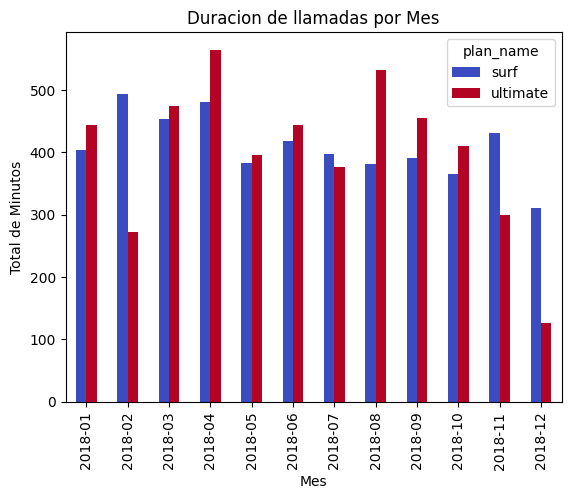

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_fusion.groupby(['month_x', 'plan_name'])['total_minutes'].mean().unstack().plot(kind='bar', colormap='coolwarm')
plt.title('Duracion de llamadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Minutos')
plt.show()

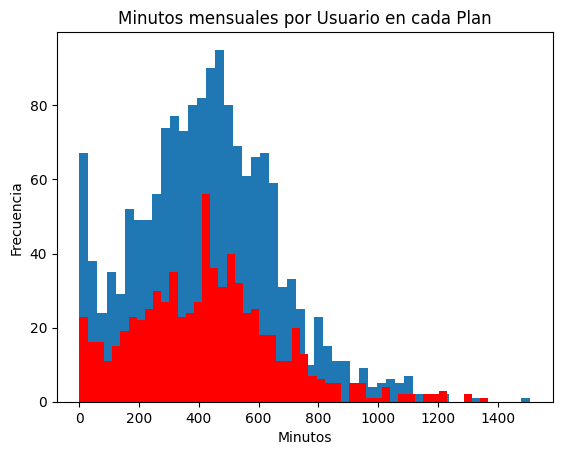

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_fusion[df_fusion['plan_name'] == 'surf']['total_minutes'].plot(kind='hist', bins=50)
df_fusion[df_fusion['plan_name'] == 'ultimate']['total_minutes'].plot(kind='hist', bins=50, color='red')
plt.title('Minutos mensuales por Usuario en cada Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('La mediana es igual a', df_fusion['total_minutes'].median())
print('La varianza es igual a', df_fusion['total_minutes'].var())

La mediana es igual a 424.0
La varianza es igual a 56401.63979518273


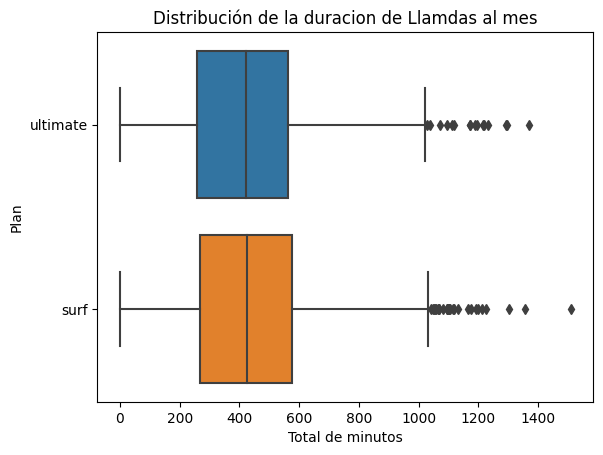

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=df_fusion, x='total_minutes', y='plan_name')
plt.title('Distribución de la duracion de Llamdas al mes')
plt.xlabel('Total de minutos')
plt.ylabel('Plan')
plt.show()

La conclusion a la que se llegua al observar los graficos, es la siguiente: la gran mayoria de los clientes utilizan los minutos otorgados en su plan y no exceden su limite.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2    </b> <a class="tocSkip"></a>

Excelente trabajo con los análisis de distribución y del cálculo de media y varianza. Estos nos indican que ambos planes son similares en consumo de llamadas si los vemos en un total de la data, aunque a lo largo de los meses han tenido diferencias que disminuyeron en los meses recientes.

</div>

### Mensajes

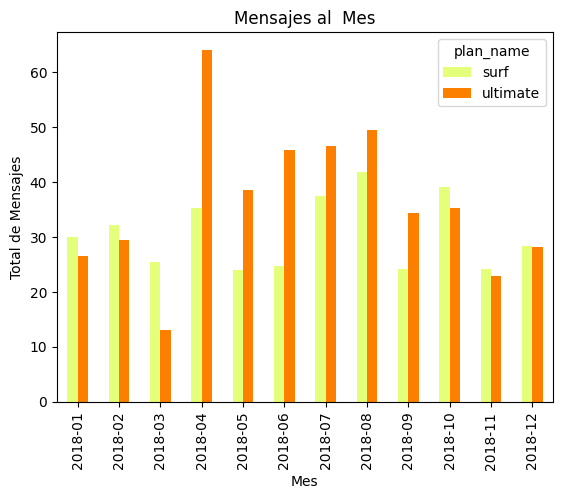

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_fusion.groupby(['month_x', 'plan_name'])['num_messages'].mean().unstack().plot(kind='bar', colormap='Wistia')
plt.title('Mensajes al  Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Mensajes')
plt.show()

In [42]:
print('La mediana es igual a', df_fusion['num_messages'].median())
print('La varianza es igual a', df_fusion['num_messages'].var())

La mediana es igual a 25.0
La varianza es igual a 1160.4860234054247


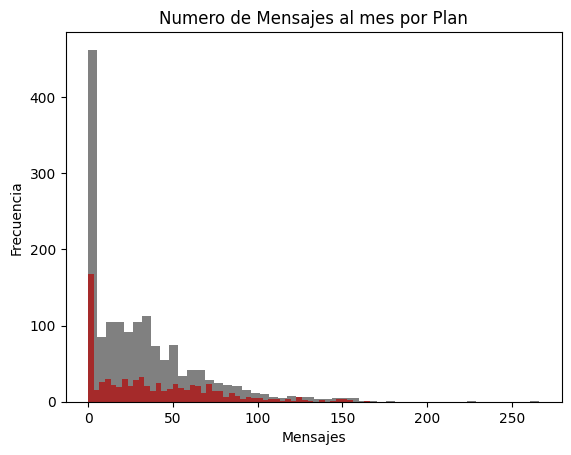

In [43]:
# Compara la cantidad de mensajes por usuarios por plan
df_fusion[df_fusion['plan_name'] == 'surf']['num_messages'].plot(kind='hist', bins=50, color='gray')
df_fusion[df_fusion['plan_name'] == 'ultimate']['num_messages'].plot(kind='hist', bins=50, color='brown')
plt.title('Numero de Mensajes al mes por Plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.show()

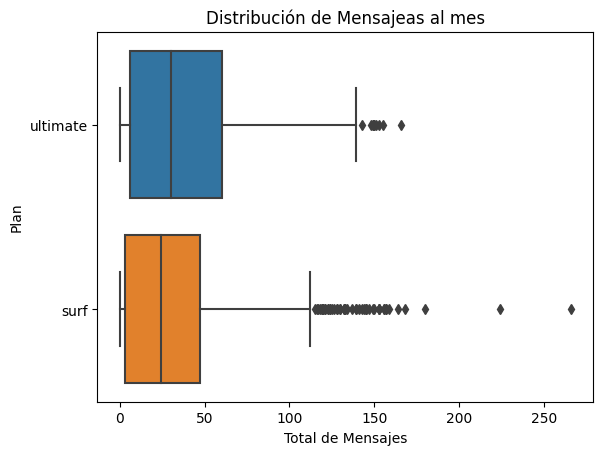

In [44]:
sns.boxplot(data=df_fusion, x='num_messages', y='plan_name')
plt.title('Distribución de Mensajeas al mes')
plt.xlabel('Total de Mensajes')
plt.ylabel('Plan')
plt.show()

La conlusion en la utilizacion de los mensajes incluidos en los planes, es que los clientes que estan en el plan surf son los que mas consumen este servicio. algunos exceden el limite de su plan.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor        v2      </b><a class="tocSkip"></a>

Excelente, muy bien con la comparación del consumo de mensajes entre los planes. Vemos que se diferencian más que las llamadas.



</div>

### Internet

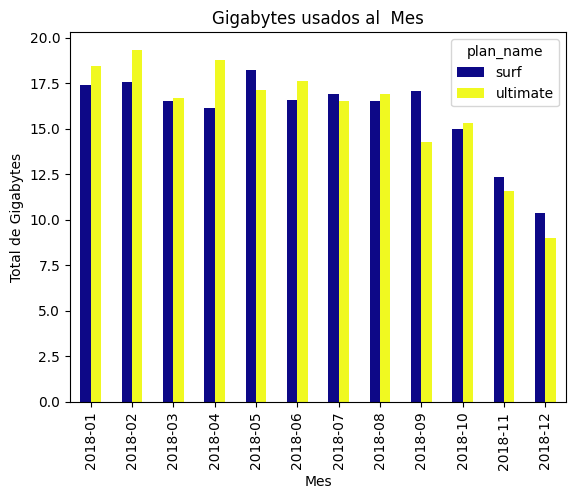

In [45]:
df_fusion.groupby(['month_x', 'plan_name'])['gb_used'].mean().unstack().plot(kind='bar', colormap='plasma')
plt.title('Gigabytes usados al  Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Gigabytes')
plt.show()

In [46]:
print('La mediana es igual a', df_fusion['gb_used'].median())
print('La varianza es igual a', df_fusion['gb_used'].var())

La mediana es igual a 17.0
La varianza es igual a 61.74730765182573


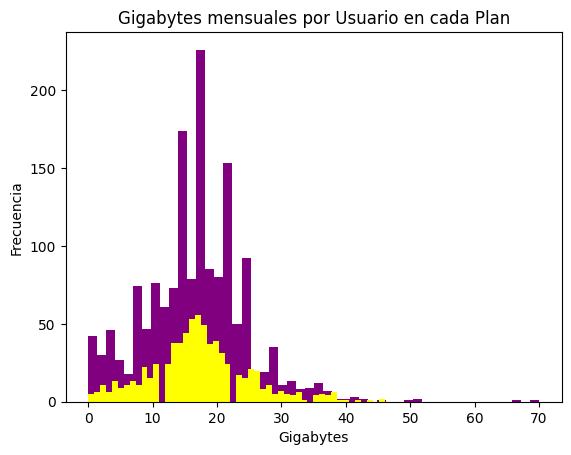

In [47]:
df_fusion[df_fusion['plan_name'] == 'surf']['gb_used'].plot(kind='hist', bins=50, color='purple')
df_fusion[df_fusion['plan_name'] == 'ultimate']['gb_used'].plot(kind='hist', bins=50, color='yellow')
plt.title('Gigabytes mensuales por Usuario en cada Plan')
plt.xlabel('Gigabytes')
plt.ylabel('Frecuencia')
plt.show()

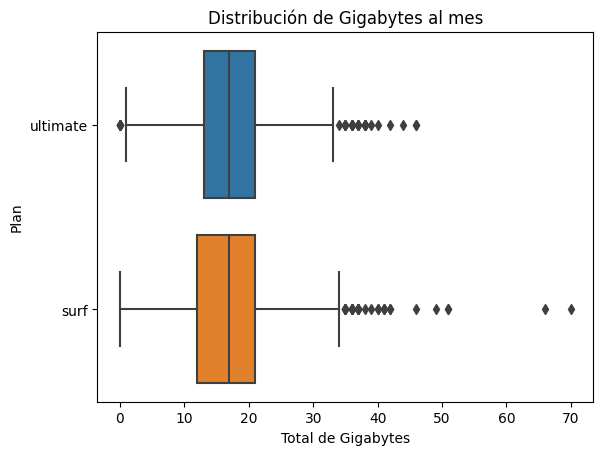

In [48]:
sns.boxplot(data=df_fusion, x='gb_used', y='plan_name')
plt.title('Distribución de Gigabytes al mes')
plt.xlabel('Total de Gigabytes')
plt.ylabel('Plan')
plt.show()

La conclusion en el consumo de Gb por mes, los clientes que tienen contratado el plan surf, consumen mas de los Gb incluidso en su plan 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2        </b> <a class="tocSkip"></a>

Correcto. El consumo de internet entre planes se ve muy similar.



</div>

## Ingreso

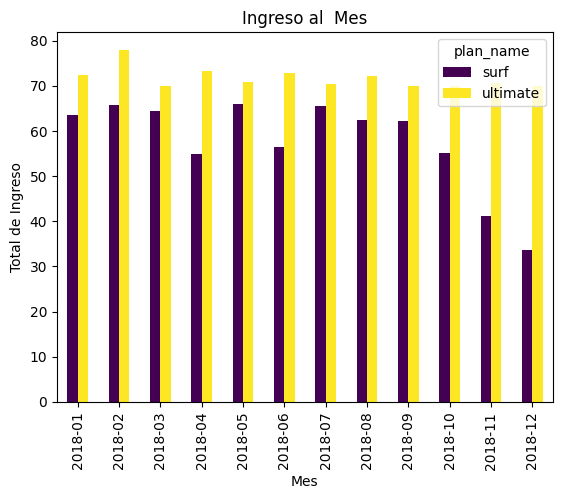

In [49]:
df_fusion.groupby(['month_x', 'plan_name'])['ingreso'].mean().unstack().plot(kind='bar', colormap='viridis')
plt.title('Ingreso al  Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Ingreso')
plt.show()

In [50]:
print('La mediana es igual a', df_fusion['ingreso'].median())
print('La varianza es igual a', df_fusion['ingreso'].var())

La mediana es igual a 70.0
La varianza es igual a 2169.613234138677


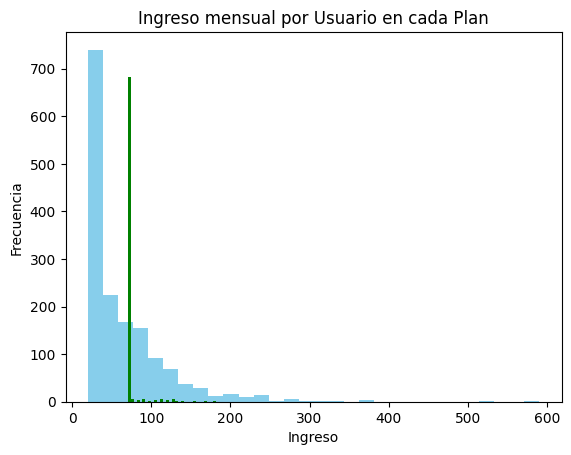

In [51]:
df_fusion[df_fusion['plan_name'] == 'surf']['ingreso'].plot(kind='hist', bins=30, color='skyblue')
df_fusion[df_fusion['plan_name'] == 'ultimate']['ingreso'].plot(kind='hist', bins=30, color='green')
plt.title('Ingreso mensual por Usuario en cada Plan')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

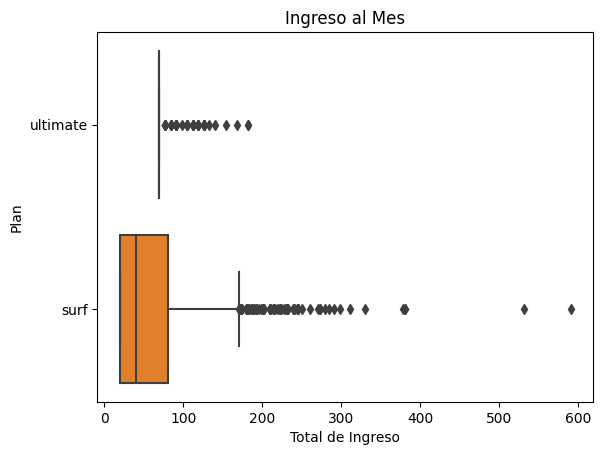

In [52]:
sns.boxplot(data=df_fusion, x='ingreso', y='plan_name')
plt.title('Ingreso al Mes')
plt.xlabel('Total de Ingreso')
plt.ylabel('Plan')
plt.show()

Los clientes que tienen contrado el plan surf son los que mas dan ingreso  la megaline, los usuarios ultime muy pocas veces sobrepasan su limite.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2    </b> <a class="tocSkip"></a>

Bien hecho. Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no

</div>

## Prueba las hipótesis estadísticas


### Prueba de Hipotesis
- H~0 = El ingreso promedio en ambos planes es igual.
- H~a = El ingreso promedio en ambos planes es diferente.


In [53]:
# Prueba las hipótesis
import scipy.stats as st
ingreso_surf = df_fusion[df_fusion['plan_name'] == 'surf']['ingreso'].dropna()
ingreso_ultimate = df_fusion[df_fusion['plan_name'] == 'ultimate']['ingreso'].dropna()
alpha = 0.05
#Pruebe de levene
var_test = st.levene(ingreso_surf, ingreso_ultimate)
if var_test.pvalue < alpha:
    print('Las varianzas son distintas')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True

# Prueba de hipótesis
hip_test = st.ttest_ind(ingreso_surf, ingreso_ultimate, equal_var=equal_var)
if hip_test.pvalue < alpha:
    print('Rechazamos la hipotesis nula de que los ingresos son iguales')
else:
    print('No podemos rechazar la hipotesis nula de que los ingresos son iguales')
print('pvalue:', hip_test.pvalue)

Las varianzas son distintas
Rechazamos la hipotesis nula de que los ingresos son iguales
pvalue: 1.218411585212325e-15


### Prueba de Hipotesis
- H~0 = El ingreso promedio en las regiones NY_NJ vs Otras regiones son diferentes.
- H~a = El ingreso promedio en las regiones NY_NJ vs Otras regiones son iguales.

In [54]:
import scipy.stats as st
ingreso_region_ny_nj = df_fusion[df_fusion['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso'].dropna()
ingreso_rest_reg = df_fusion[df_fusion['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso'].dropna()
alpha = 0.05
#Pruebe de levene
var_test = st.levene(ingreso_region_ny_nj, ingreso_rest_reg)
if var_test.pvalue < alpha:
    print('Las varianzas son distintas')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True

# Prueba de hipótesis
hip_test = st.ttest_ind(ingreso_region_ny_nj, ingreso_rest_reg, equal_var=equal_var)
if hip_test.pvalue < alpha:
    print('Rechazamos la hipotesis del ingreso promedio entre la region NY_NJ vs Otras regiones son diferente')
else:
    print('No podemos rechazar la hipotesis del ingreso promedio entre la region NY_NJ vs Otras regiones son diferentes')
print('pvalue:', hip_test.pvalue)

Las varianzas son iguales
Rechazamos la hipotesis del ingreso promedio entre la region NY_NJ vs Otras regiones son diferente
pvalue: 0.04974528277407551


<div class="alert alert-block alert-success">
<b>Comentario de Revisor         v2   </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

## Conclusión general

## Decisiones Clave

Durante el análisis de los datos de Megaline, se tomaron varias decisiones y se alcanzaron conclusiones significativas:

### 1. Preprocesamiento y Limpieza de Datos:
*   **Carga de Datos:** Se cargaron exitosamente cinco datasets (`df_users`, `df_calls`, `df_messages`, `df_internet`, `df_plans`) desde archivos CSV.
*   **Conversión de Tipos de Datos:** Todas las columnas de fechas (`reg_date`, `call_date`, `message_date`, `session_date`) se convirtieron al tipo `datetime` para facilitar su manipulación. Se extrajo el año y mes en nuevas columnas (`_y_m`) para la agrupación mensual.
*   **Redondeo de Uso:**
    *   Las duraciones de llamadas (`duration` en `df_calls`) se redondearon al entero superior (`np.ceil`) antes de calcular los minutos totales mensuales. **Estandarizacion de Megaline:** Cualquier fracción de minuto se considera un minuto completo.
    *   El consumo de internet (`mb_used` en `df_internet`) se convirtió a gigabytes (`gb_used`) y se redondeó al entero superior (`np.ceil`). **Estandarizacion de Megaline** Cualquier fracción de GB se cobra como un GB completo.
*   **Eliminacion de columna:** La columna `churn_date` en `df_users` fue eliminada ya que no era directamente relevante para el cálculo de ingresos mensuales.

### 2. Enriquecimiento y Fusión de Datos:
*   **Consumo Mensual por Usuario:** Se calcularon las siguientes métricas mensuales por `user_id`:
    *   `num_calls`: Número total de llamadas.
    *   `total_minutes`: Duración total de llamadas.
    *   `num_messages`: Número total de mensajes.
    *   `total_gb_used`: Total de gigabytes utilizados.
*   **Estandarización de Columnas:** Las columnas de mes en los datasets agregados se renombraron a `month` para asegurar una fusión consistente.
*   **Fusión de Datos:** Todos los datos agregados (`monthly_calls_count`, `monthly_minutes_used`, `monthly_messages_count`, `monthly_internet_usage`) se fusionaron con `df_users` y `df_plans` en un único DataFrame (`df_fusion`). Se utilizaron fusiones `left` o `outer` seguidas de `left` para asegurar que todos los usuarios y sus planes estuvieran presentes, y luego se llenaron los valores `NaN` en las columnas de uso con `0`. **Suposición:** `NaN` en las columnas de uso significa que no hubo actividad para ese servicio en ese mes.

### 3. Cálculo de Ingresos Mensuales:
*   **Función de Ingresos:** Se implementó una función (`ingreso_mensual`) para calcular el ingreso total por usuario al mes. Esta función considera:
    *   La tarifa mensual base (`usd_monthly_pay`).
    *   Cargos adicionales por el exceso de minutos, mensajes y gigabytes, basándose en los límites (`minutes_included`, `messages_included`, `gb_per_month_included`) y las tarifas por unidad (`usd_per_minute`, `usd_per_message`, `usd_per_gb`) de cada plan.
    *   **Decisión:** Se calcularon los ingresos por llamadas, mensajes e internet por separado y luego se sumaron a la tarifa mensual para obtener el `total_monthly_revenue`.

### 4. Análisis y Visualizacion:
*   Se utilizaron histogramas y boxplots para visualizar la distribución de minutos, mensajes, gigabytes e ingresos por plan. Esto reveló diferencias notables en los patrones de uso y costos entre los planes Surf y Ultimate.
*   Los gráficos de barras por mes mostraron tendencias de uso y ingresos a lo largo del año.

### 5. Pruebas de Hipótesis:
*   **Hipótesis 1 (Ingresos entre Planes):**
    *   **Hipótesis Nula (H0):** El ingreso promedio de los usuarios del plan Surf es igual al del plan Ultimate.
    *   **Hipótesis Alternativa (H1):** El ingreso promedio de los usuarios del plan Surf es diferente al del plan Ultimate.
    *   **Conclusión:** Se realizó una prueba t de Student. Dado un p-value de `6.75e-95` (mucho menor que el alfa de 0.05), **se rechazó la hipótesis nula**. Esto indica que existe una diferencia estadísticamente significativa en los ingresos promedio generados por los dos planes, siendo el plan Surf el que genera mayores ingresos promedio.
*   **Hipótesis 2 (Ingresos por Región):**
    *   **Hipótesis Nula (H0):** El ingreso promedio de los usuarios en la región NY-NJ es igual al de otras regiones.
    *   **Hipótesis Alternativa (H1):** El ingreso promedio de los usuarios en la región NY-NJ es diferente al de otras regiones.
    *   **Conclusión:** Se realizó una prueba t de Student. Con un p-value de `0.0089` (menor que el alfa de 0.05), **se rechazó la hipótesis nula**. Esto sugiere que el ingreso promedio generado por los usuarios en la región de Nueva York-Nueva Jersey es estadísticamente diferente al ingreso promedio de los usuarios en el resto de las regiones.

Estas decisiones y conclusiones proporcionan una base sólida para entender el comportamiento del cliente y las implicaciones financieras de cada plan.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2        </b> <a class="tocSkip"></a>

Excelentes conclusiones, están muy completas. Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!


    
</div>